## Spambase dataset : Classify if a message is spam or not spam

#### Importing Data and libraries

In [1]:
##Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
import sklearn   
from sklearn import model_selection
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer


* Splitting the datafile into Label and Message fields.

In [2]:
#Reading the data messages
message = pd.read_csv('SMSSpamCollection', sep='\t',quoting=csv.QUOTE_NONE, names=["label", "message"])
print(message)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
5     spam  FreeMsg Hey there darling it's been 3 week's n...
6      ham  Even my brother is not like to speak with me. ...
7      ham  As per your request 'Melle Melle (Oru Minnamin...
8     spam  WINNER!! As a valued network customer you have...
9     spam  Had your mobile 11 months or more? U R entitle...
10     ham  I'm gonna be home soon and i don't want to tal...
11    spam  SIX chances to win CASH! From 100 to 20,000 po...
12    spam  URGENT! You have won a 1 week FREE membership ...
13     ham  I've been searching for the right words to tha...
14     ham                I HAVE A DATE ON SUNDAY WITH WILL!!
15    sp

* there are in total : 5574 messages
* first column is a the label containinig whether the message is a normal message ("ham") or "spam". 
* And, the second column is the message itself.

## Exploratory Data Analysis

In [3]:
#displaying first 10 rows of the data.
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
label      5574 non-null object
message    5574 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
message.describe()

,label,message
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


* Describing the data shows that the most used message is " Sorry, I'll call later".
* and, the spam message is "Please call our customer representative ..."

In [6]:
message.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

* Displaying the length of messages

In [7]:
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
message.label.unique()

array(['ham', 'spam'], dtype=object)

In [9]:
message['label'] = message.label.map({'ham':0, 'spam':1})

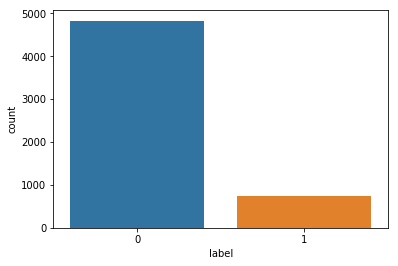

In [10]:
#seaborn
sns.countplot(x='label',data=message)

### Data Visualization

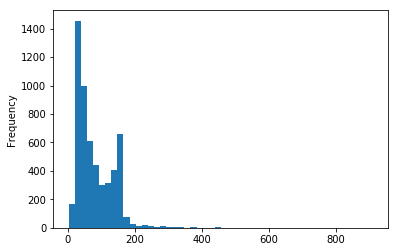

In [11]:
message['length'].plot(bins=50,kind='hist')

In [12]:
message.length.describe()

count    5574.000000
mean       80.478292
std        59.848302
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [13]:
message[message['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

* Above is the longest message available in the data.
* below is the rate of message length of Ham and Spam messages.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6390CB630>,
      dtype=object)

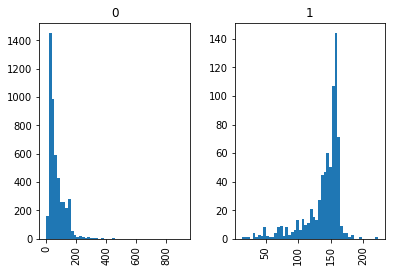

In [14]:
message.hist(column='length', by='label', bins=50)

## Data Pre-Processing


In [15]:
# Defining nopunc for excluding puncuations in text.
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

sample message


In [16]:
nopunc.split()

['sample', 'message']

In [17]:
message.message.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

* Importing and downloading stop words

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IRILQV\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

* Splitting the messages to break into individual words.

In [20]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [21]:
message['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

## Feature Engineering & TFIDF

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

##### convert words into vectors using CountVectorizer
* Mapping unique word to a number using "Bag of words".

In [23]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(message['message'])
print(len(bow_transformer.vocabulary_))

11425


In [26]:
bow_transformer.fit(message['message'])
messages_bow = bow_transformer.transform(message['message'])
print ('sparse matrix shape:', messages_bow.shape)
print ('number of non-zeros:', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

sparse matrix shape: (5574, 11425)
number of non-zeros: 50547
sparsity: 0.08%


* Using bow_transformer: to get it's bag of words as count of vectors

In [27]:
message1 = message['message'][6]
print (message1)

Even my brother is not like to speak with me. They treat me like aids patent.


In [28]:
test1 = bow_transformer.transform([message1])
print (test1)
print (test1.shape)

  (0, 1802)	1
  (0, 4590)	1
  (0, 5193)	1
  (0, 7800)	2
  (0, 8761)	1
  (0, 9971)	1
  (0, 10629)	1
(1, 11425)


* since the row (0,7800) count is 2  , checking on the word which is occuring twice

In [29]:
print (bow_transformer.get_feature_names()[7800])

like


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(message['message'])
# encode document
vector = vectorizer.transform(message['message'])
# summarize encoded vector
print(vector.shape)
print(vector.toarray())

(5574, 8713)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(vector)
messages_tfidf=tfidf_transformer.transform(vector)
print(messages_tfidf.shape)

(5574, 8713)


In [33]:
print (bow_transformer)

CountVectorizer(analyzer=<function text_process at 0x000001B63A0E10D0>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)


* Applying TFIDF transformation
* Example of the transformed values vectorized for each word.

In [34]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['like']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['beautiful']])

6.293843086153116
8.527435307660209


###### Displaying the TDIF features as below,

In [35]:
print(bow_transformer.get_feature_names()[0:20])

['0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505']


### Modelling the classifiers

In [36]:
%time spam_detector = MultinomialNB().fit(messages_tfidf, message['label'])

Wall time: 4.15 ms


In [37]:
%time spam_detector = BernoulliNB().fit(messages_tfidf, message['label'])

Wall time: 9.8 ms


* classifying an random message 

In [38]:
all_predictions = spam_detector.predict(messages_tfidf)
print (all_predictions)

[0 0 1 ... 0 0 0]


In [39]:
print("Accuracy: {:.2f}%".format(100 * metrics.accuracy_score(message['label'],all_predictions)))
print ('Confusion Matrix :\n', confusion_matrix(message['label'], all_predictions))
print ('(Row = expected, Col = predicted)')

Accuracy: 98.82%
Confusion Matrix :
 [[4824    3]
 [  63  684]]
(Row = expected, Col = predicted)


Text(0.5, 257.44, 'Predicted label')

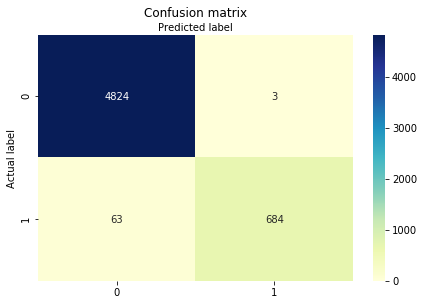

In [40]:
cnf_matrix = metrics.confusion_matrix(message['label'], all_predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

In [41]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(message['label'],all_predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4827
           1       1.00      0.92      0.95       747

   micro avg       0.99      0.99      0.99      5574
   macro avg       0.99      0.96      0.97      5574
weighted avg       0.99      0.99      0.99      5574



## Model fitting and evaluating the classfiers upon model performance

#### Splitting the Data into Test and Train sets

In [42]:
X = message["message"]
y = message["label"]
X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.3, random_state = 42)

In [43]:
print (len(X_train), len(X_test), len(X_train) + len(X_test))

3901 1673 5574


##### Normalizaling and transforming using TF-IDF

In [44]:
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X1_train = vectorizer.fit_transform(X_train).toarray()
X1_test = vectorizer.transform(X_test).toarray()
print (len(X1_train),len(X1_test))

3901 1673


In [47]:
print (len(X1_train),len(X1_test))
print(X1_train.shape)
print ('sparse matrix shape:', X1_train.shape)

3901 1673
(3901, 39251)
sparse matrix shape: (3901, 39251)


#### applying GaussianNB, BernoulliNB and MultinomialNB classifier

In [51]:
#applying GaussianNB classifier
GaussNB = GaussianNB()
GaussNB.fit(X1_train, y_train)
trainGaussActual=y_train
trainGaussPredicted=GaussNB.predict(X1_train)
GaussExpected = y_test
GaussPredicted=GaussNB.predict(X1_test)
metrics.accuracy_score(y_test, y_pred)

0.9647340107591154

In [52]:
#applying BernoulliNB classifier
BerNB = BernoulliNB(binarize=0.2,alpha=0.001,class_prior=[0.4,0.2])
BerNB.fit(X1_train, y_train)
trainBernActual=y_train
trainBernPredicted=BerNB.predict(X1_train)
bernoulliExpected = y_test
bernoulliPredicted=BerNB.predict(X1_test)
metrics.accuracy_score(y_test, y_pred)

0.9647340107591154

In [53]:
#applying MultinomialNB classifier
MultiNB = MultinomialNB()
MultiNB.fit(X1_train, y_train)
y_pred = MultiNB.predict(X1_test)
metrics.accuracy_score(y_test, y_pred)
trainMultiActual=y_train
trainMultiPredicted=MultiNB.predict(X1_train)
multinomialExpected = y_test
multinomialPredicted=MultiNB.predict(X1_test)
metrics.accuracy_score(y_test, y_pred)

0.9473998804542738

### Performing 10-fold cross validation to evaluate models

* Catering TF-IDF using GaussianNB, BernoulliNB and MultinomialNB

In [54]:
models = []
models.append(('GaussNB', GaussianNB()))
models.append(('BerNB', BernoulliNB()))
models.append(('MultiNB', MultinomialNB()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X1_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, 100*cv_results.mean(), cv_results.std())
    print(msg)

GaussNB: 95.975343 (0.008275)
BerNB: 94.847138 (0.010488)
MultiNB: 94.026887 (0.016064)


* Applying cross validation on BernoulliNB classifiers using pipelining

Text(0.5, 257.44, 'Predicted label')

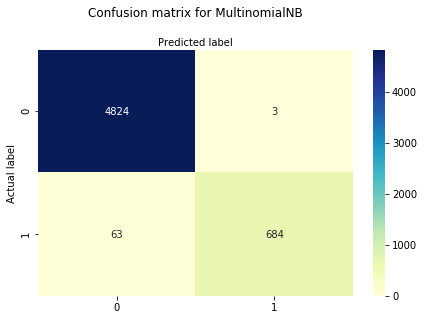

In [55]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for MultinomialNB\n', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 

### Compute the accuracy and confusion matrix for each models 
#### And, Evaluating classifiers on test data
##### 1. GaussianNB Model

In [56]:
print(" ********************************** Train Results Start Here ********************************** \n")

print(classification_report(trainGaussActual,trainGaussPredicted))
print("confusion_matrix:\n",confusion_matrix(trainGaussActual, trainGaussPredicted))
accuracyScore=accuracy_score(trainGaussActual, trainGaussPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %","\n")


print(" ********************************** Test Results Start Here ********************************** \n")
print(classification_report(GaussExpected, GaussPredicted))
print("confusion_matrix:\n",confusion_matrix(GaussExpected, GaussPredicted))
accuracyScore=accuracy_score(GaussExpected, GaussPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

 ********************************** Train Results Start Here ********************************** 

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3380
           1       0.96      1.00      0.98       521

   micro avg       0.99      0.99      0.99      3901
   macro avg       0.98      1.00      0.99      3901
weighted avg       0.99      0.99      0.99      3901

confusion_matrix:
 [[3357   23]
 [   0  521]]
The Accuracy Score is 99.0  % 

 ********************************** Test Results Start Here ********************************** 

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1447
           1       0.85      0.90      0.87       226

   micro avg       0.96      0.96      0.96      1673
   macro avg       0.92      0.94      0.93      1673
weighted avg       0.97      0.96      0.97      1673

confusion_matrix:
 [[1410   37]
 [  22  204]]
The Accuracy Score is 96.0 

#### 2. BernoulliNB Model

In [57]:
print(" ********************************** Train Results Start Here ********************************** \n")

print(classification_report(trainBernActual,trainBernPredicted))
print("confusion_matrix:\n",confusion_matrix(trainBernActual, trainBernPredicted))
accuracyScore=accuracy_score(trainBernActual, trainBernPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %","\n")


print(" ********************************** Test Results Start Here ********************************** \n")
print(classification_report(bernoulliExpected, bernoulliPredicted))
print("confusion_matrix:\n",confusion_matrix(bernoulliExpected, bernoulliPredicted))
accuracyScore=accuracy_score(bernoulliExpected, bernoulliPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

 ********************************** Train Results Start Here ********************************** 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      3380
           1       0.58      1.00      0.74       521

   micro avg       0.90      0.90      0.90      3901
   macro avg       0.79      0.94      0.84      3901
weighted avg       0.94      0.90      0.91      3901

confusion_matrix:
 [[3006  374]
 [   0  521]]
The Accuracy Score is 90.0  % 

 ********************************** Test Results Start Here ********************************** 

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1447
           1       0.80      0.89      0.84       226

   micro avg       0.95      0.95      0.95      1673
   macro avg       0.89      0.93      0.91      1673
weighted avg       0.96      0.95      0.96      1673

confusion_matrix:
 [[1395   52]
 [  24  202]]
The Accuracy Score is 95.0 

#### 3 MultinomialNB Model

In [58]:
print(" ********************************** Train Results Start Here ********************************** \n")

print(classification_report(trainMultiActual,trainMultiPredicted))
print("confusion_matrix:\n",confusion_matrix(trainMultiActual, trainMultiPredicted))
accuracyScore=accuracy_score(trainMultiActual, trainMultiPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %","\n")


print(" ********************************** Test Results Start Here ********************************** \n")
print(classification_report(multinomialExpected, multinomialPredicted))
print("confusion_matrix:\n", confusion_matrix(multinomialExpected, multinomialPredicted))
accuracyScore=accuracy_score(multinomialExpected, multinomialPredicted, normalize=True)
print("The Accuracy Score is",str(round(accuracyScore*100,0))," %")

 ********************************** Train Results Start Here ********************************** 

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3380
           1       1.00      0.74      0.85       521

   micro avg       0.97      0.97      0.97      3901
   macro avg       0.98      0.87      0.92      3901
weighted avg       0.97      0.97      0.96      3901

confusion_matrix:
 [[3380    0]
 [ 133  388]]
The Accuracy Score is 97.0  % 

 ********************************** Test Results Start Here ********************************** 

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1447
           1       1.00      0.61      0.76       226

   micro avg       0.95      0.95      0.95      1673
   macro avg       0.97      0.81      0.86      1673
weighted avg       0.95      0.95      0.94      1673

confusion_matrix:
 [[1447    0]
 [  88  138]]
The Accuracy Score is 95.0 

#### Upon observation based on performance of the above models, for the given spamset , Gaussian NB gives the better accuracy among all. 
####  Gaussian Model : Training data - 99% and Test data - 96%)